<a href="https://colab.research.google.com/github/kingdraw69/class-ciencia-de-datos/blob/main/actividad_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bar_char es gráfico de barras


#La ingeniería de las características
Es el proceso de usar el dominio del conocimiento de los datos para crear nuevas características (feature vectors) con el fin de lograr que los algoritmos de machine learning funcionen correctamente.

Feature vectors son vectores de n-dimensiones que representan un objeto. Muchos algoritmos de machine learning requieren una representación numérica de los objetos, ya que tales representaciones facilitan el procesamiento y el análisis estadístico.



##¿Cómo se hundió el titanic?
De acuerdo con lo conocido, por la proa del barco donde estaban las habitaciones de tercera clase.

Conclusión: Pclass es una feature **clave** para el clasificador

In [5]:
#Image(url="https://heraldodemexico.com.mx/u/fotografias/fotosnoticias/2021/4/14/355907.jpg")

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/titanic-train (2).csv')

In [8]:
def extract_title(data):
  title=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return title

In [9]:
df["Title"]=extract_title(df)

In [10]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


##2.1 Creando un mapeo de los títulos
Reemplazamos lo títulos encontrados por los siguientes valores:
* Mr: 0
* Miss: 1
* Mrs: 2
* Otros: 3

In [11]:
def replace_titles(data):
  title_mapping = {"Mr":0,"Miss":1,"Mrs":2}
  data["Title"] = data["Title"].map(title_mapping).fillna(3) #Si no es ninguno regresar 3
  return data

In [12]:
df=replace_titles(df)
df[["Name","Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",0.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0
2,"Heikkinen, Miss. Laina",1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0
4,"Allen, Mr. William Henry",0.0


In [13]:
def bar_char(feature):
  survived=df[df["Survived"]==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=["Sobrevivientes","Fallecidos"]
  test.plot(kind="bar",stacked=True,figsize=(10,5))

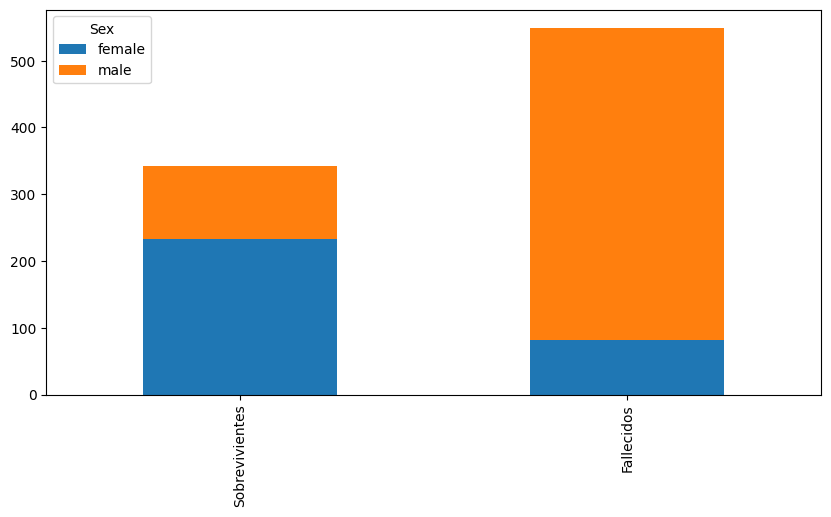

In [14]:
bar_char("Sex")

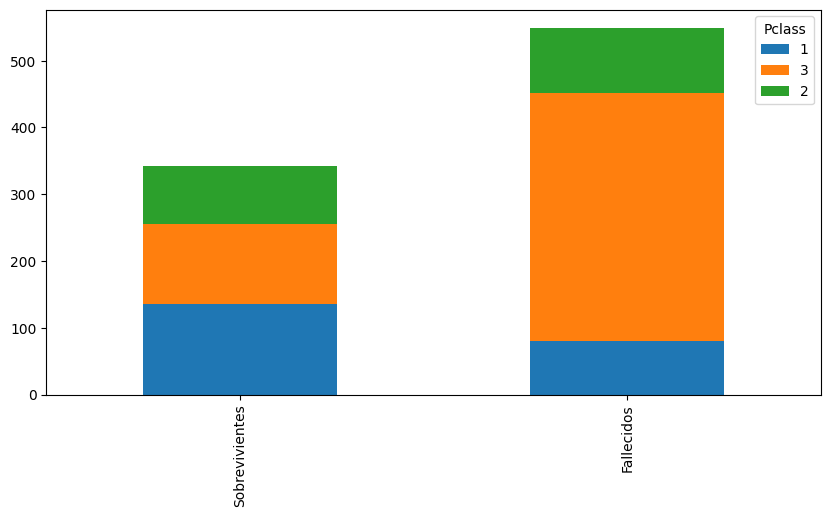

In [15]:
bar_char("Pclass")

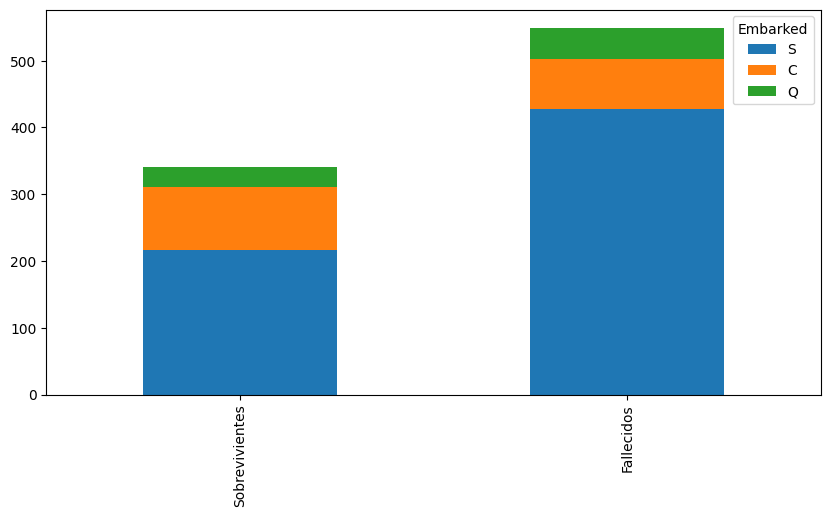

In [16]:
bar_char("Embarked")

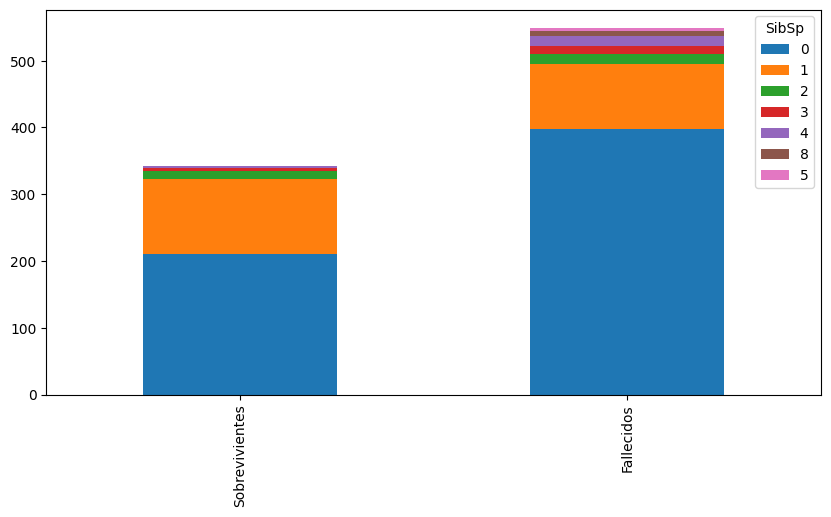

In [17]:
bar_char("SibSp")

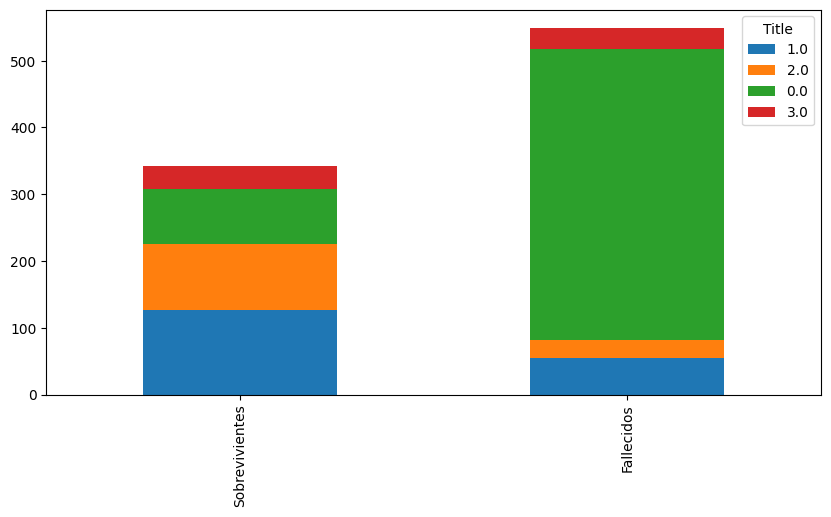

In [18]:
bar_char("Title")

Se observa que las Mss tenían mayores probabilidades de sobrevivir, mientras que los señores la menor probabilidad de sobrevivir

##2.4 Edad
###2.4.1 Rellenar los NaN en edades
Estrategia: Se calcula la media de los títulos y se reemplaza por las edades faltantes

In [19]:
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
0.0,32.368090
1.0,21.773973
2.0,35.898148
3.0,20.430161


In [20]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)
#apply es poner sobre, si es nulo q lo rellene y si no q lo deje quieto

In [21]:
df[["Title","Age"]].sample(15)

,Title,Age
849,2.0,35.898148
861,0.0,21.000000
411,0.0,32.368090
787,3.0,8.000000
283,0.0,19.000000
83,0.0,28.000000
342,0.0,28.000000
225,0.0,22.000000
860,0.0,41.000000
168,0.0,32.368090


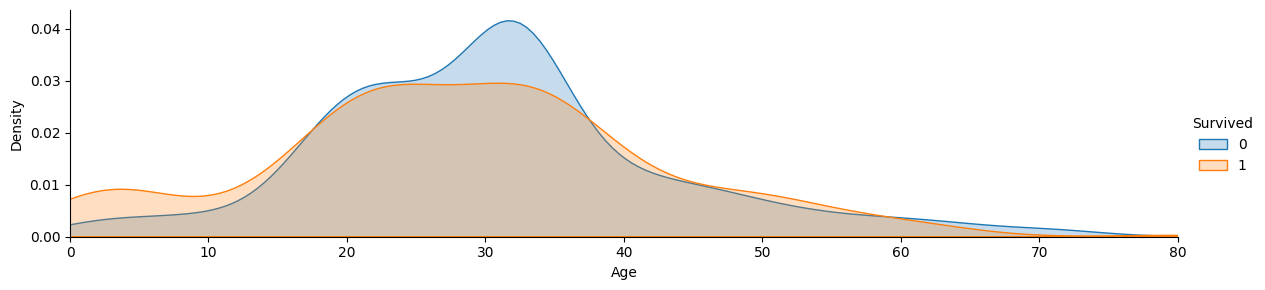

In [22]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

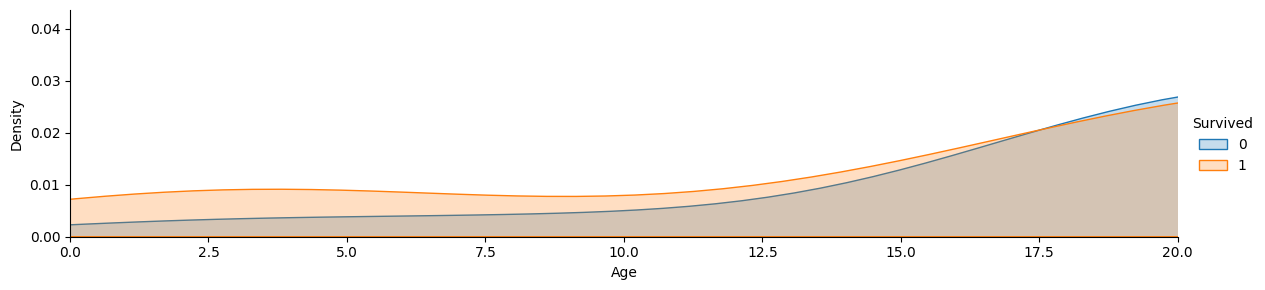

In [23]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(0,20) #para hacerle zoom

(20.0, 30.0)

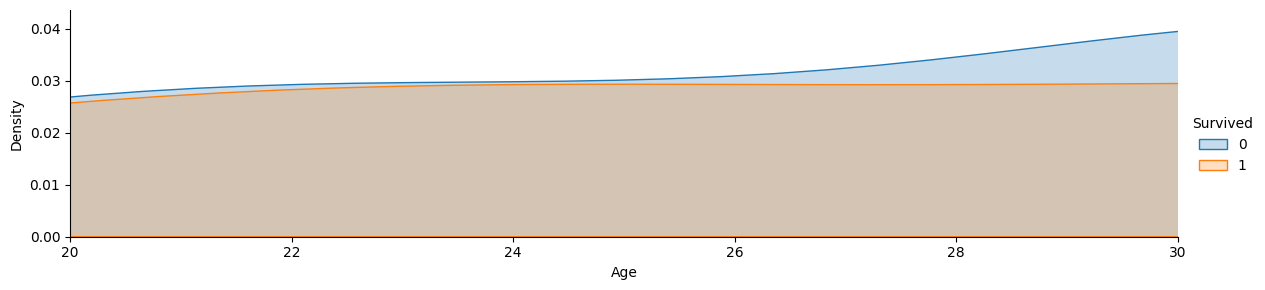

In [24]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(20,30) #para hacerle zoom

(30.0, 40.0)

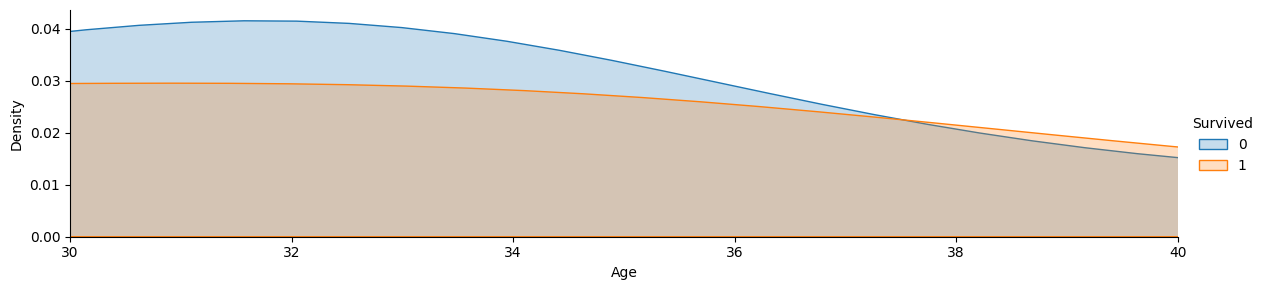

In [25]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(30,40) #para hacerle zoom

(40.0, 60.0)

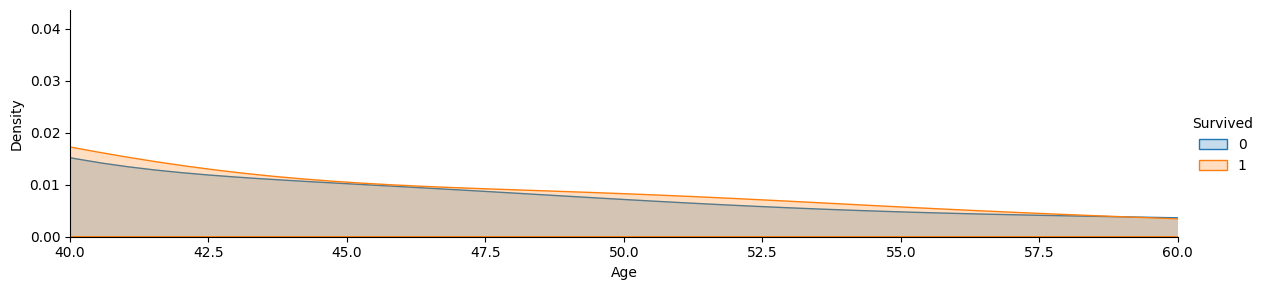

In [26]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(40,60) #para hacerle zoom

(60.0, 80.0)

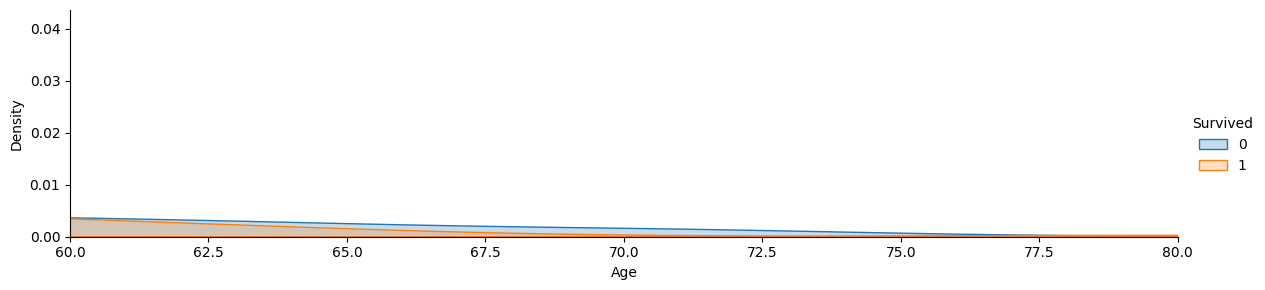

In [27]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(60) #para hacerle zoom

## 2.4.2 Bining
Es convertit una variable numérica a categórica, en este caso, la edad
* niño: 0
* joven: 1
* adulto: 2
* edad madura: 3
* edad avanzada: 4

In [28]:
df["Age_Category"]=pd.cut(df["Age"], bins=[0,16,26,36,62, float("inf")], labels=[0,1,2,3,4],right=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,2


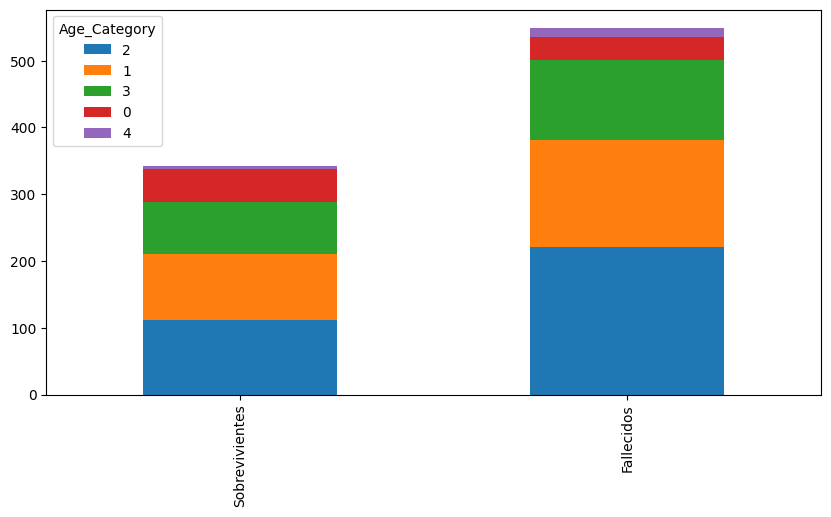

In [29]:
bar_char("Age_Category")

Se observa como había mayores probabilidades de sobrevivir para los niños

trataremos de identificar las filas que poseen los nulos de Embarked

In [38]:
filas_con_nulos = df[df['Fare'].isnull()]
filas_con_nulos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,Fare_Category


fare convirtiendo las variables en categóricas pues no posee datos nulos




In [35]:

Max_Fare=df["Fare"].max()
Min_Fare=df["Fare"].min()
print("Máximo Fare:", Max_Fare)
print("Máximo Fare:", Min_Fare)

mediana_fare = df["Fare"].median()
print("Mediana de Fare:", mediana_fare)

Máximo Fare: 512.3292
Máximo Fare: 0.0
Mediana de Fare: 14.4542


In [36]:
df["Fare_Category"]=pd.cut(df["Fare"], bins=[0,5,14,50,300, float("inf")], labels=[0,1,2,3,4],right=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,2,1


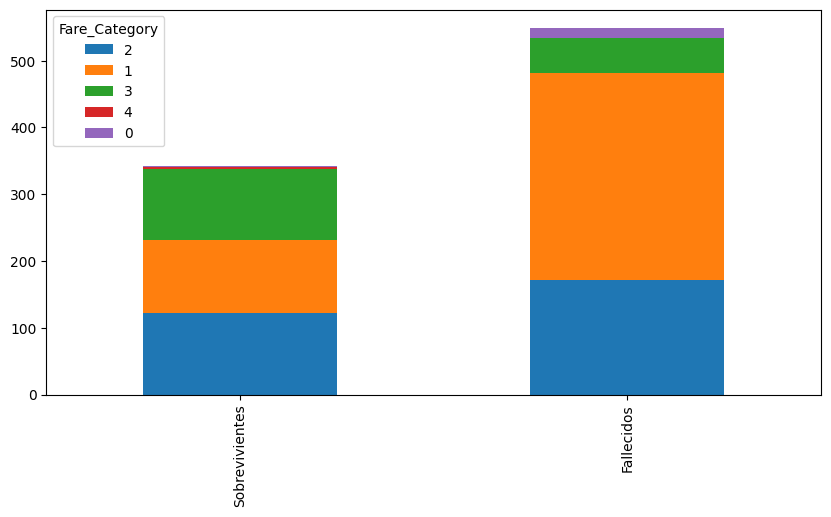

In [37]:
bar_char("Fare_Category")

mediante la grafica se observa que a mayor costo del pasaje, mayores eran las probabilidades de supervivencia.
---
